In [64]:
# artificial data
import numpy as np
import pandas as pd
size = 1000
df = pd.DataFrame(columns=['uid', 'gender', 'age_group', 'ug_channel', 'click'])
df['uid'] = np.arange(1000, 2000)
df['gender'] = np.random.choice(('male', 'female'), size=size)
df['age_group'] = np.random.choice(('young', 'middle_age', 'old'), size=size)
df['ug_channel'] = np.random.choice(('app_store', 'pre_install', 'ads'), size=size)
df['click'] = np.random.randint(100, size=size)

# manipulate data for middle aged men
df['click'][df['age_group'] == 'middle_age']= df['click'] * (1 + np.random.rand()*0.3)

df['ug_cost'] = df['click'] * (0.5 + np.random.rand()*0.2)
df['ug_cost'][df['age_group'] == 'middle_age'] = df['ug_cost'][df['age_group'] == 'middle_age']* (1 + np.random.rand()*0.3)

C:\Users\ericyliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ericyliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [39]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_widgets()

In [40]:
# ANOVA with scipy 

import scipy.stats as stats
stats.f_oneway(df['click'][df['age_group'] == 'young'],df['click'][df['age_group'] == 'middle_age'],df['click'][df['age_group'] == 'old'])

F_onewayResult(statistic=7.547051856384517, pvalue=0.0005583678321611765)

In [41]:
# ANOVA with statsmodels

import statsmodels.api as sm

from statsmodels.formula.api import ols

model = ols('click ~ C(age_group, Sum)', data=df).fit()

table = sm.stats.anova_lm(model, typ=2) # Type 2 ANOVA DataFrame

print(table)

                          sum_sq     df         F    PR(>F)
C(age_group, Sum)   13664.595045    2.0  7.547052  0.000558
Residual           902577.689867  997.0       NaN       NaN


In [42]:
# normality test with Shapiro-Wilk test

import scipy.stats as stats
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9554682970046997, pvalue=7.314341257777697e-17)

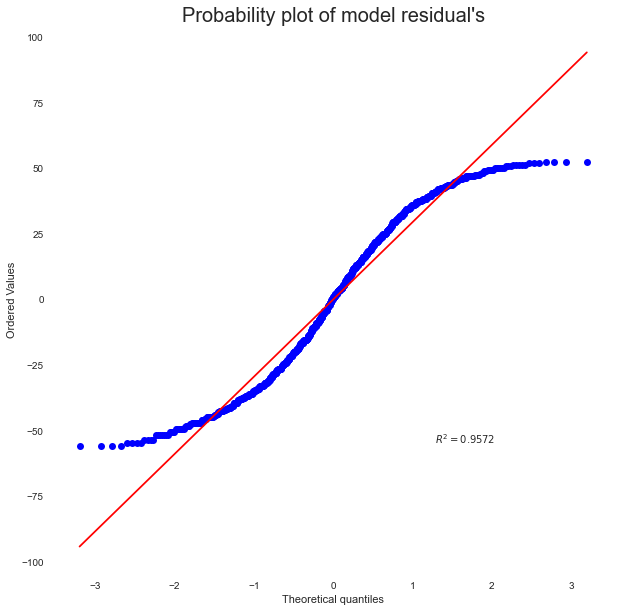

In [43]:
# normality test with probability plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [44]:
# homogeneity of variance with Levene's Test
stats.levene(df['click'][df['age_group'] == 'young'],
             df['click'][df['age_group'] == 'middle_age'],
             df['click'][df['age_group'] == 'old'])

LeveneResult(statistic=0.9975194744873794, pvalue=0.3691608711813078)

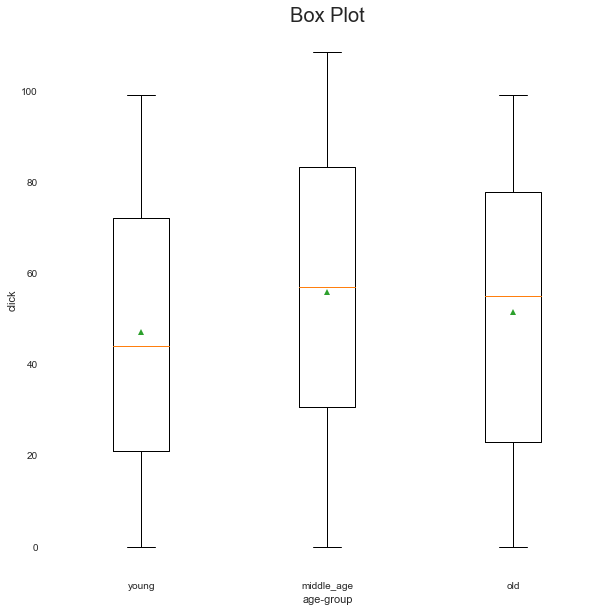

In [45]:
# homogeneity of variance with box plot

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot", fontsize= 20)
ax.set

data = [df['click'][df['age_group'] == 'young'],
        df['click'][df['age_group'] == 'middle_age'],
        df['click'][df['age_group'] == 'old']]

ax.boxplot(data,
           labels= ['young', 'middle_age', 'old'],
           showmeans= True)

plt.xlabel("age-group")
plt.ylabel("click")

plt.show()

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2 meandiff p-adj   lower    upper  reject
---------------------------------------------------------
middle_age    old  -4.4114 0.1449   -9.917  1.0943  False
middle_age  young   -8.952  0.001 -14.3607 -3.5433   True
       old  young  -4.5407 0.1292 -10.0463   0.965  False
---------------------------------------------------------


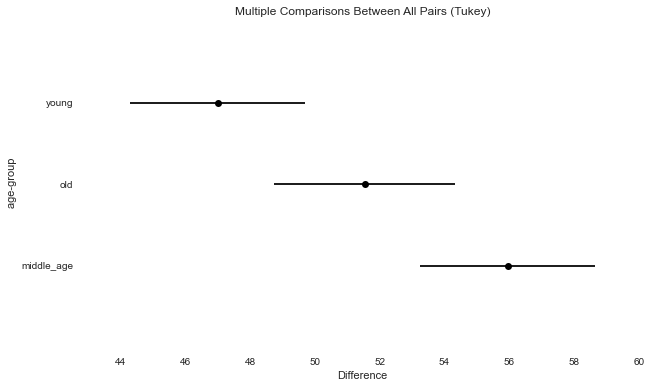

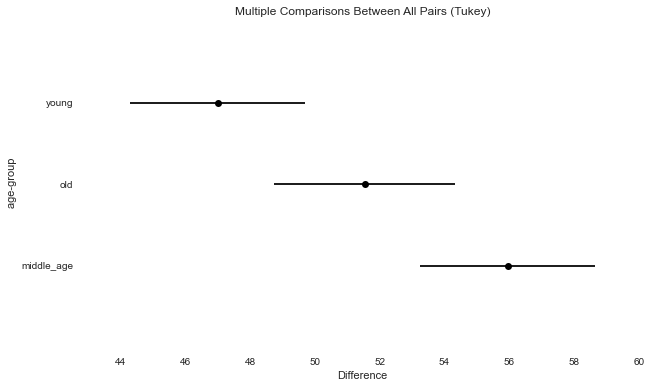

In [46]:
# Pairwise comparison with Tukey HSD

import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['click'], df['age_group'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
# Plot with Tukey HSD
post_hoc_res.plot_simultaneous(ylabel= " age-group", xlabel= "Difference")

In [67]:
# ANCOVA
from pingouin import ancova
#perform ANCOVA
ancova(data=df[['click','ug_cost','age_group']], dv='click', covar='ug_cost', between='age_group')

,Source,SS,DF,F,p-unc,np2
0,age_group,25209.196939,2,1458.142797,1.266883e-296,0.745417
1,ug_cost,837222.031357,1,96852.690517,0.000000e+00,0.989821
2,Residual,8609.705510,996,NaN,NaN,NaN


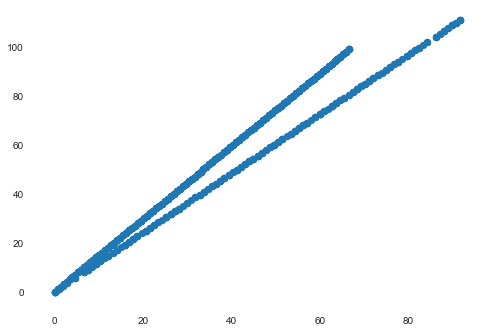

In [71]:
# ANCOVA
# The linearity assumption
import matplotlib.pyplot as plt
plt.scatter(df['ug_cost'], df['click'])
plt.show()